## Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv('Desktop/Datasets/SBAnational.csv')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [4]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


### Column Descriptions
1. LoanNr_ChkDgt	Identifier Primary key
1. Name	Borrower name
2. City	Borrower city
3. State	Borrower state
4. Zip	Borrower zip code
5. Bank	Bank name
6. BankState	Bank state
7. NAICS	North American industry classification system code
8. ApprovalDate	Date SBA commitment issued
9. ApprovalFY	Fiscal year of commitment
10. Term	Loan term in months
11. NoEmp	Number of business employees
12. NewExist	1 = Existing business, 2 = New business
13. CreateJob	Number of jobs created
14. RetainedJob	Number of jobs retained
15. FranchiseCode	Franchise code, (00000 or 00001) = No franchise
16. UrbanRural	1 = Urban, 2 = rural, 0 = undefined
17. RevLineCr	Revolving line of credit: Y = Yes, N = No
18. LowDoc	LowDoc Loan Program: Y = Yes, N = No
19. ChgOffDate	The date when a loan is declared to be in default
20. DisbursementDate	Disbursement date
21. DisbursementGross	Amount disbursed
22. BalanceGross	Gross amount outstanding
23. MIS_Status	Loan status charged off = CHGOFF, Paid in full =PIF
24. ChgOffPrinGr	Charged-off amount
25. GrAppv	Gross amount of loan approved by bank
26. SBA_Appv	SBA’s guaranteed amount of approved loan

Description of the first two digits of NAICS.

Sector	Description
1. 11	Agriculture, forestry, fishing and hunting
2. 21	Mining, quarrying, and oil and gas extraction
3. 22	Utilities
4. 23	Construction
5. 31–33	Manufacturing
6. 42	Wholesale trade
7. 44–45	Retail trade
8. 48–49	Transportation and warehousing
9. 51	Information
10. 52	Finance and insurance
11. 53	Real estate and rental and leasing
12. 54	Professional, scientific, and technical services
13. 55	Management of companies and enterprises
14. 56	Administrative and support and waste management and remediation services
15. 61	Educational services
16. 62	Health care and social assistance
17. 71	Arts, entertainment, and recreation
18. 72	Accommodation and food services
19. 81	Other services (except public administration) 92 Public administration

## Visualize the dataset to find missing values

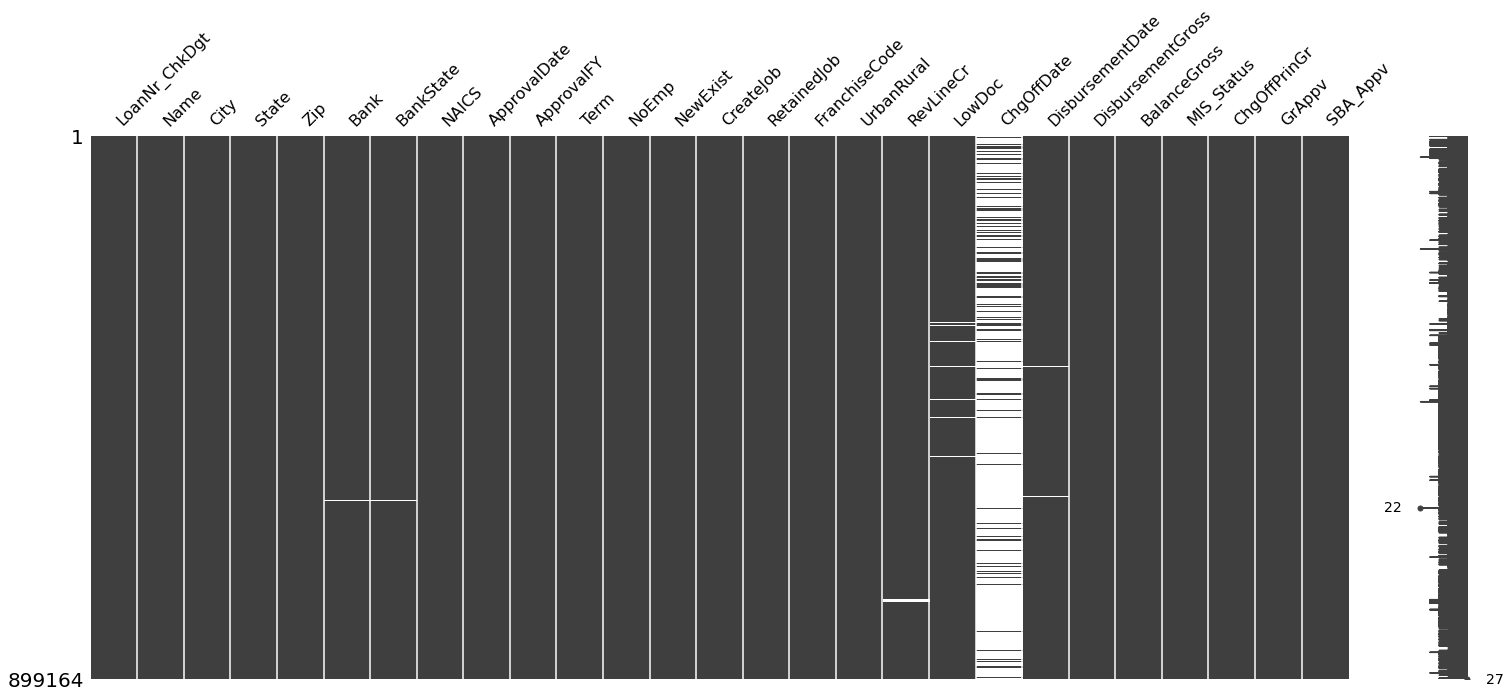

In [5]:
msno.matrix(df)

#### Check for duplicate values

In [3]:
duplicate_series = df['LoanNr_ChkDgt'].duplicated(keep='first') 
df[duplicate_series]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


## Data cleaning and create new features

In [4]:
## Drop null values
df = df[(df['Bank'].notnull()) & (df['BankState'].notnull())]

In [12]:
df[df['State'].isnull()]

,LoanNr_ChkDgt,Name,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,0,28-Jul-81,1981,120,1,...,N,N,5-Mar-90,NaN,$0.00,$0.00,NaN,"$11,364.00","$15,000.00","$15,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,0,18-May-66,1966,282,0,...,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,0,12-Feb-87,1987,240,19,...,N,N,NaN,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,541511,21-Jan-88,1988,73,8,...,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,811192,5-Aug-88,1988,120,17,...,N,N,NaN,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,"$119,000.00","$119,000.00"
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,532230,19-May-89,1989,16,1,...,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,451110,19-Oct-89,1990,84,3,...,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,0,19-Oct-89,1990,204,8,...,N,N,NaN,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$252,600.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,0,26-Oct-89,1990,240,7,...,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,448310,14-Dec-89,1990,60,4,...,N,N,NaN,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,"$250,000.00","$212,500.00"


In [5]:
df.loc[(df['City'] == 'PENNSVILLE') & (df['State'].isnull()), 'State'] = 'NJ'
df.loc[df['LoanNr_ChkDgt'] == 1380800010, 'State'] = 'NY'
df.loc[(df['City'] == 'CAMERON PARK') & (df['State'].isnull()), 'State'] = 'CA'
df.loc[(df['LoanNr_ChkDgt'] == 3113583009) & (df['State'].isnull()), 'State'] = 'AP'
df.loc[(df['City'] == 'WICHITA') & (df['State'].isnull()), 'State'] = 'KS'
df.loc[(df['City'] == 'PALM BEACH GARDENS') & (df['State'].isnull()), 'State'] = 'FL'
df.loc[(df['City'] == 'CASCO') & (df['State'].isnull()), 'State'] = 'WI'
df.loc[(df['City'] == 'SOMERSET') & (df['State'].isnull()), 'State'] = 'WI'
df.loc[(df['City'] == 'SALT LAKE CITY') & (df['State'].isnull()), 'State'] = 'UT'
df.loc[(df['City'] == 'LAKE OZARK') & (df['State'].isnull()), 'State'] = 'MO'

In [6]:
df = df[(df['City'].notnull()) & (df['State'].notnull()) & (df['Name'].notnull())]

In [7]:
df = df[(df['NewExist'] != 0.0) & (df['NewExist'].notnull())]

In [8]:
df = df[(df['RevLineCr'] == 'Y') | (df['RevLineCr'] == 'N')]

In [9]:
df = df[(df['LowDoc'] == 'Y') | (df['LowDoc'] == 'N')]

In [10]:
df = df[(df['DisbursementDate'].notnull()) & (df['MIS_Status'].notnull())]

In [11]:
df.isnull().sum()

LoanNr_ChkDgt             0
Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           496457
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [12]:
def sector_simplify(x):
    x = str(x)
    if len(x) > 1:
        if x[:2] == "11":
            return 'Agriculture, forestry, fishing and hunting'
        elif x[:2] == "21":
            return 'Mining, quarrying, oil and gas extraction'
        elif x[:2] == "22":
            return 'Utilities'
        elif x[:2] == "23":
            return 'Construction'
        elif x[:2] in ['31', '32', '33', '34']:
            return 'Manufacturing'
        elif x[:2] == '42':
            return 'Wholesale Trade'
        elif x[:2] in ['44', '45', '46']:
            return 'Retail trade'
        elif x[:2] in ['48','49','50']:
            return 'Transportation and Warehousing'
        elif x[:2] == '52':
            return 'Finance and Insurance'
        elif x[:2] == '53':
            return 'Real estate, rental and leasing'
        elif x[:2] == '54':
            return 'Professional, scientific, and technical services'
        elif x[:2] == '55':
            return 'Management of companies and enterprises'
        elif x[:2] == '56':
            return 'Administrative  support and waste management and remediation services'
        elif x[:2] == '61':
            return 'Educational services'
        elif x[:2] == '62':
            return 'Health care and social assistance'
        elif x[:2] == '71':
            return 'Arts, entertainment, and recreation'
        elif x[:2] == '72':
            return 'Accommodation and food services'
        elif x[:2] == '81':
            return 'Other services'
        elif x[:2] == '92':
            return 'Public administration'
    else:
        return "Unknown"

In [13]:
df['Sector'] = df['NAICS'].apply(lambda x: sector_simplify(x))
df['Sector'].value_counts()

Unknown                                                                  153250
Retail trade                                                              80954
Construction                                                              49238
Professional, scientific, and technical services                          49202
Manufacturing                                                             45530
Other services                                                            44800
Wholesale Trade                                                           34804
Health care and social assistance                                         34505
Accommodation and food services                                           34266
Administrative  support and waste management and remediation services     22012
Transportation and Warehousing                                            15404
Real estate, rental and leasing                                            9554
Arts, entertainment, and recreation     

In [14]:
df['gross_loan'] = df['GrAppv'].apply(lambda x: x.strip('$'))
df['SBA_loan'] = df['SBA_Appv'].apply(lambda x: x.strip('$'))
df['gross_loan'] = df['gross_loan'].apply(lambda x: x.strip())
df['SBA_loan'] = df['SBA_loan'].apply(lambda x: x.strip())
df['gross_loan'] = df['gross_loan'].apply(lambda x: x.replace(',',''))
df['SBA_loan'] = df['SBA_loan'].apply(lambda x: x.replace(',',''))
df['gross_loan'] = df['gross_loan'].astype('float64')
df['SBA_loan'] = df['SBA_loan'].astype('float64')

### Convert date columns to proper format

In [15]:
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'])
df['DisbursementDate'] = pd.to_datetime(df['DisbursementDate'])
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'])

### Add column if the state of borrower is the same as state of their lender

In [16]:
df['same_state_loan'] = df['State'] == df['BankState']

In [98]:
df['same_state_loan'].value_counts()

True     320575
False    289620
Name: same_state_loan, dtype: int64

## Correlations with MIS_Status

P I F     499642
CHGOFF    110553
Name: MIS_Status, dtype: int64


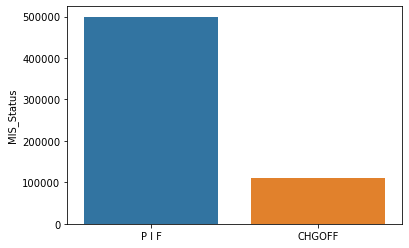

In [106]:
mis_status = df['MIS_Status'].value_counts()
print(mis_status)
sns.barplot(x=mis_status.index, y=mis_status);

## Numerical and Categorical features

In [17]:
df_cat = df[['Name', 'City', 'State', 'Zip', 'Bank', 'BankState','NAICS',
             'ApprovalDate', 'ApprovalFY', 'NewExist', 'FranchiseCode', 'UrbanRural',
            'RevLineCr','LowDoc', 'ChgOffDate', 'DisbursementDate', 'MIS_Status', 'Sector','same_state_loan']]

In [18]:
df_num = df[['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
            'BalanceGross', 'ChgOffPrinGr', 'gross_loan', 'SBA_loan', 'MIS_Status']]

## Categorical

graph for City: total = 28408


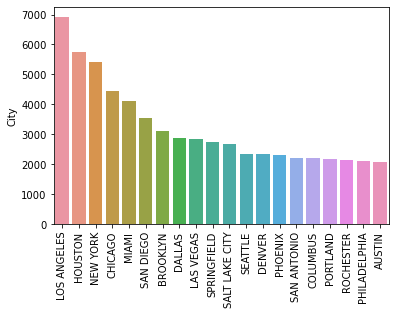

graph for State: total = 52


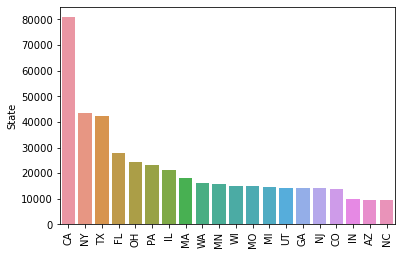

graph for Bank: total = 5466


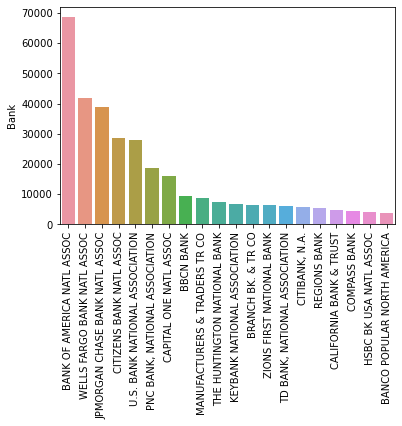

graph for NewExist: total = 2


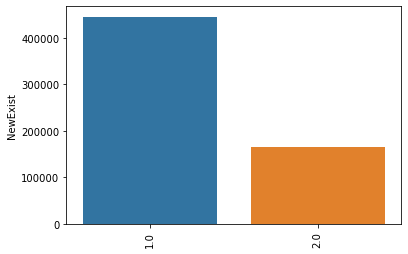

In [133]:
for i in df[['City','State', 'Bank', 'NewExist']]:
    cat_num = df[i].value_counts()
    print(f"graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index[:20], y=cat_num[:20])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show();

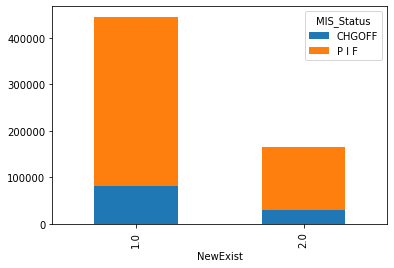

In [118]:
df_cat.groupby('NewExist')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [119]:
df_cat.groupby('NewExist')['MIS_Status'].value_counts()

NewExist  MIS_Status
1.0       P I F         364849
          CHGOFF         80227
2.0       P I F         134793
          CHGOFF         30326
Name: MIS_Status, dtype: int64

More loans for existing businesses as compared to new. Slightly bigger ratio of charged off loans for new businesses.

## Distribution of Categorical features

graph for Sector: total = 20


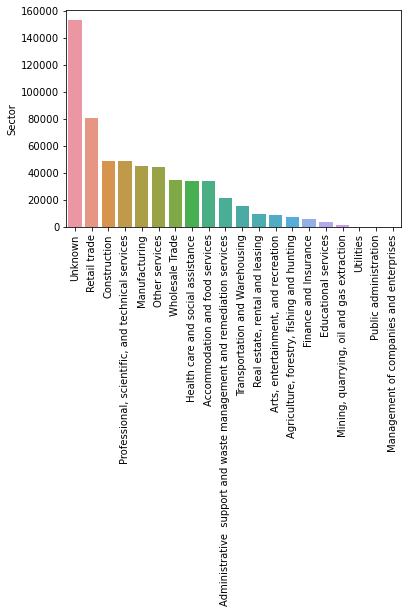

graph for UrbanRural: total = 3


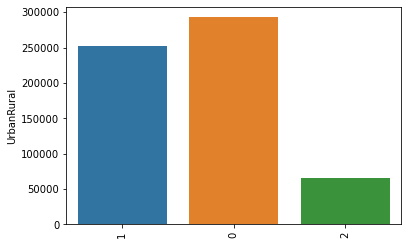

graph for RevLineCr: total = 2


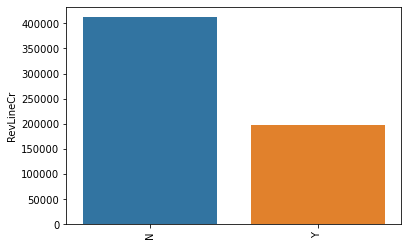

graph for LowDoc: total = 2


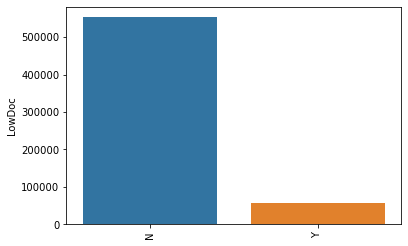

graph for same_state_loan: total = 2


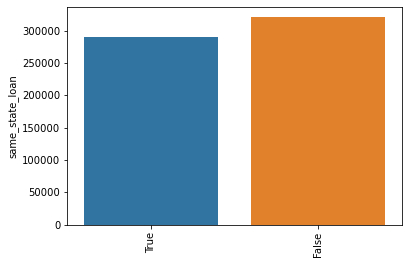

In [132]:
for i in df[['Sector','UrbanRural', 'RevLineCr', 'LowDoc', 'same_state_loan']]:
    cat_num = df[i].value_counts()
    print(f"graph for {i}: total = {len(cat_num)}")
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(cat_num.index, rotation=90)
    plt.show();

In [127]:
df_cat.groupby('Sector')['MIS_Status'].value_counts()

Sector                                                                 MIS_Status
Accommodation and food services                                        P I F          25701
                                                                       CHGOFF          8565
Administrative  support and waste management and remediation services  P I F          16537
                                                                       CHGOFF          5475
Agriculture, forestry, fishing and hunting                             P I F           6960
                                                                       CHGOFF           669
Arts, entertainment, and recreation                                    P I F           7311
                                                                       CHGOFF          1953
Construction                                                           P I F          37053
                                                                       CHGOFF         1218

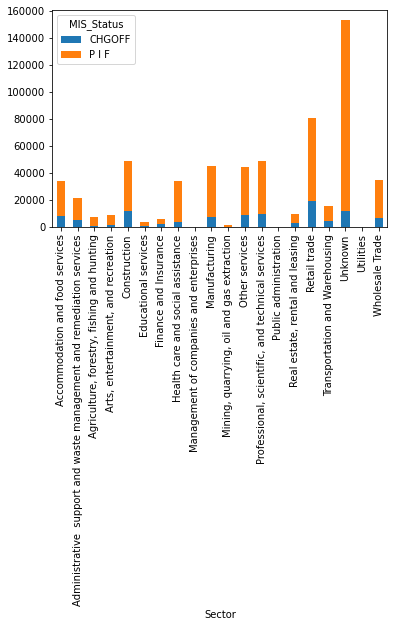

In [126]:
df_cat.groupby('Sector')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [129]:
df_cat.groupby('UrbanRural')['MIS_Status'].value_counts()

UrbanRural  MIS_Status
0           P I F         236569
            CHGOFF         16031
1           P I F         211439
            CHGOFF         81242
2           P I F          51634
            CHGOFF         13280
Name: MIS_Status, dtype: int64

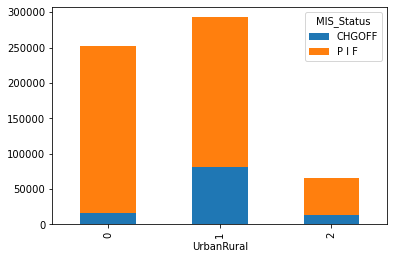

In [130]:
df_cat.groupby('UrbanRural')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

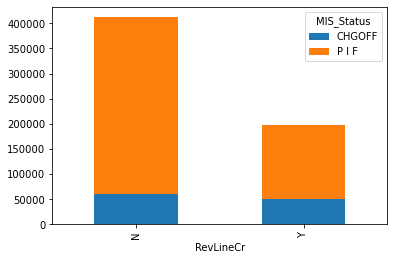

In [134]:
df_cat.groupby('RevLineCr')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [137]:
df_cat.groupby('RevLineCr')['MIS_Status'].value_counts()

RevLineCr  MIS_Status
N          P I F         352292
           CHGOFF         59858
Y          P I F         147350
           CHGOFF         50695
Name: MIS_Status, dtype: int64

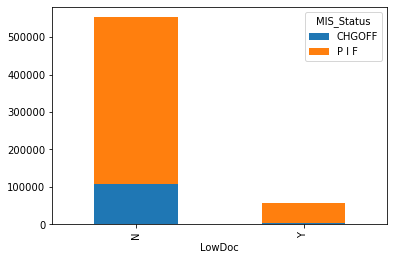

In [135]:
df_cat.groupby('LowDoc')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [139]:
df_cat.groupby('LowDoc')['MIS_Status'].value_counts()

LowDoc  MIS_Status
N       P I F         445245
        CHGOFF        107872
Y       P I F          54397
        CHGOFF          2681
Name: MIS_Status, dtype: int64

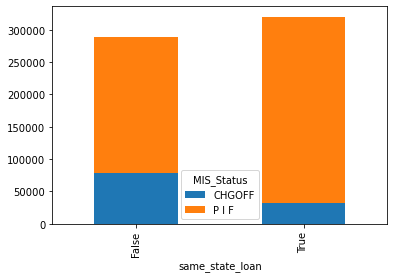

In [136]:
df_cat.groupby('same_state_loan')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [138]:
df_cat.groupby('same_state_loan')['MIS_Status'].value_counts()

same_state_loan  MIS_Status
False            P I F         211332
                 CHGOFF         78288
True             P I F         288310
                 CHGOFF         32265
Name: MIS_Status, dtype: int64

In [172]:
df['FranchiseCode'].value_counts()

1        387161
0        197349
78760      1606
21780       615
50564       400
          ...  
90500         1
52413         1
53950         1
27305         1
52898         1
Name: FranchiseCode, Length: 2245, dtype: int64

### Add a feature describing if it is a franchise or not

In [19]:
def franchise(x):
    if x == 0 or x == 1:
        return False
    else:
        return True

In [20]:
df['is_franchise'] = df['FranchiseCode'].apply(lambda x: franchise(x))
df['is_franchise'].value_counts()

False    584510
True      25685
Name: is_franchise, dtype: int64

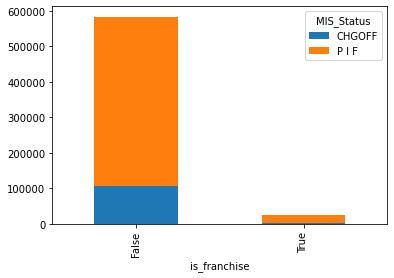

In [180]:
df.groupby('is_franchise')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [181]:
df.groupby('is_franchise')['MIS_Status'].value_counts()

is_franchise  MIS_Status
False         P I F         476961
              CHGOFF        107549
True          P I F          22681
              CHGOFF          3004
Name: MIS_Status, dtype: int64

## Numerical Features

171458.9289309155


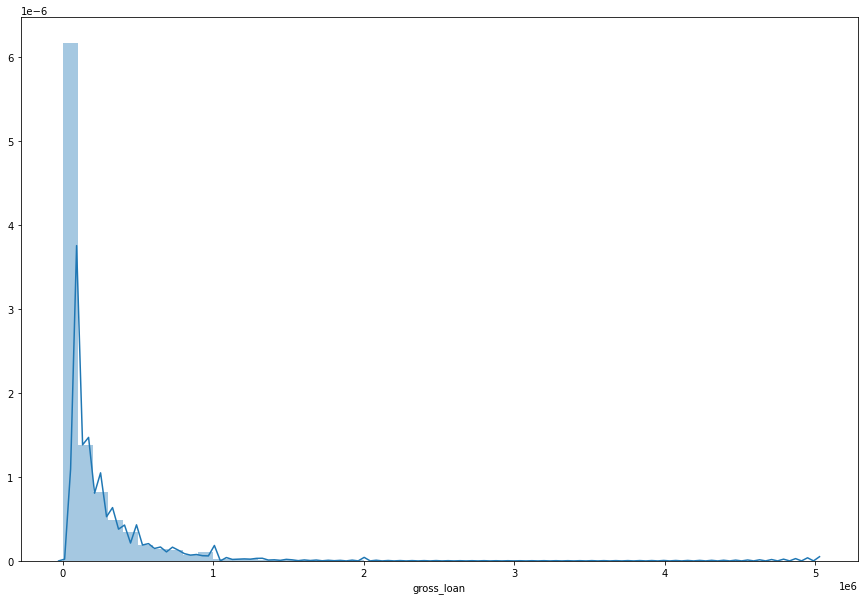

In [140]:
print(df_num['gross_loan'].mean())
fig = plt.figure(figsize=(15,10))
sns.distplot(df_num['gross_loan']);

### The gross loans are skewed to the right and can affect the model's predictions

In [21]:
df_num['gross_loan'] = np.log(df_num['gross_loan'])

<ipython-input-21-451711329a26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['gross_loan'] = np.log(df_num['gross_loan'])


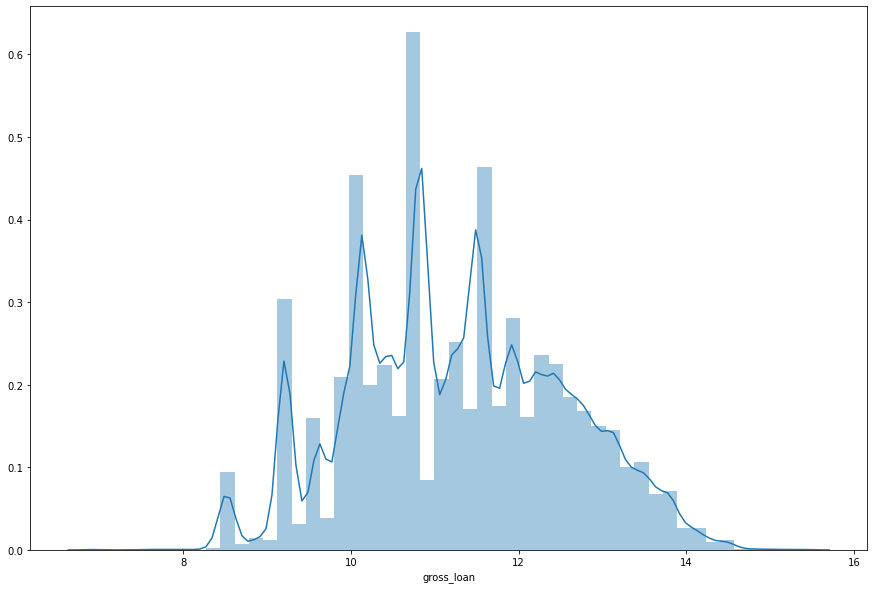

In [166]:
fig = plt.figure(figsize=(15,10))
sns.distplot(df_num['gross_loan']);

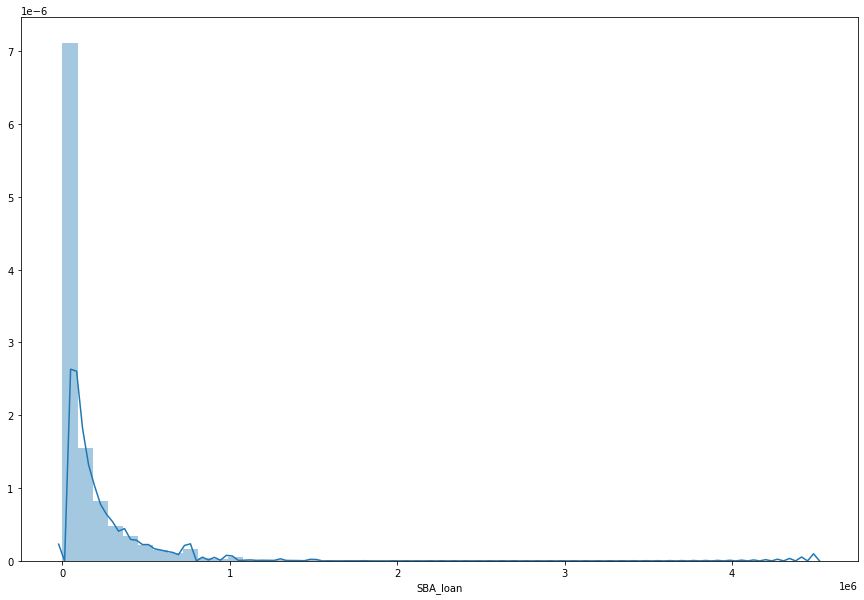

In [143]:
fig = plt.figure(figsize=(15,10))
sba_chart = sns.distplot(df_num['SBA_loan'])
plt.show;

### The SBA approved loans are also skewed to the right and can affect the model

In [22]:
df_num['SBA_loan'] = np.log(df_num['SBA_loan'])

<ipython-input-22-299d8b7bc0cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['SBA_loan'] = np.log(df_num['SBA_loan'])


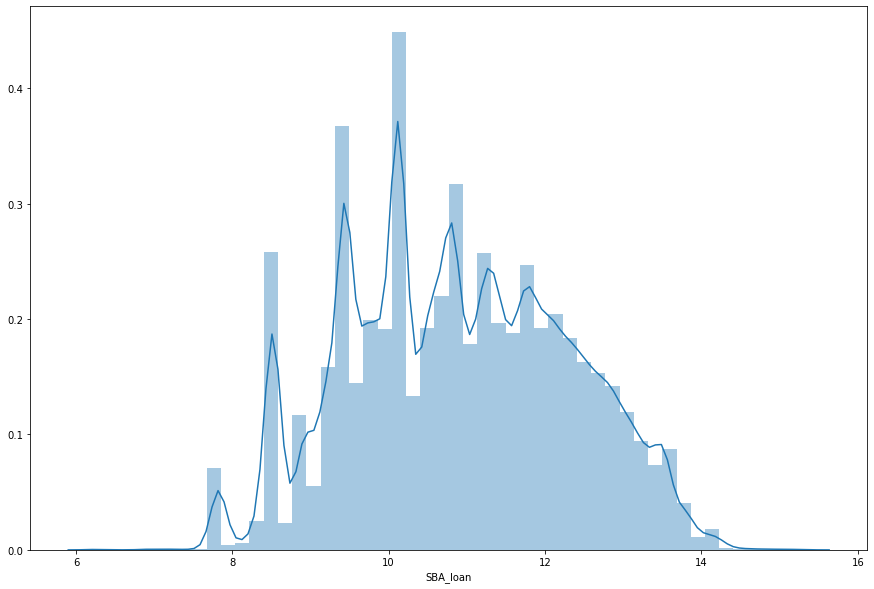

In [169]:
fig = plt.figure(figsize=(15,10))
sba_chart = sns.distplot(df_num['SBA_loan'])
plt.show;

## Add a feature describing if the SBA loan amount guaranteed is equal to the loan approved by the bank. If not then it is lower than the bank loan.

In [23]:
df['SBA_loan_coverage'] = df['gross_loan'] == df['SBA_loan']
df['SBA_loan_coverage'].value_counts()

False    557929
True      52266
Name: SBA_loan_coverage, dtype: int64

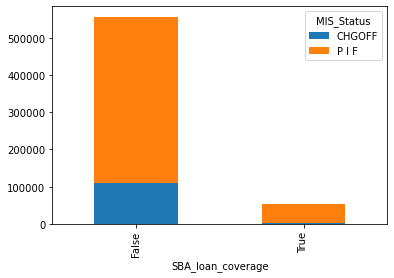

In [146]:
df.groupby('SBA_loan_coverage')['MIS_Status'].value_counts().unstack().plot(kind='bar', stacked=True);

In [147]:
df.groupby('SBA_loan_coverage')['MIS_Status'].value_counts()

SBA_loan_coverage  MIS_Status
False              P I F         448216
                   CHGOFF        109713
True               P I F          51426
                   CHGOFF           840
Name: MIS_Status, dtype: int64

In [155]:
df_num.groupby('MIS_Status')['gross_loan'].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,110553.0,97667.904308,176353.555603,1000.0,25000.0,45000.0,100000.0,3500000.0
P I F,499642.0,187786.257588,269676.747241,1000.0,35000.0,90000.0,230000.0,5000000.0


In [154]:
df_num.groupby('MIS_Status')['Term'].describe()

,count,mean,std,min,25%,50%,75%,max
MIS_Status,,,,,,,,
CHGOFF,110553.0,53.820385,43.073008,0.0,28.0,48.0,66.0,461.0
P I F,499642.0,116.490099,76.474363,0.0,72.0,84.0,144.0,527.0


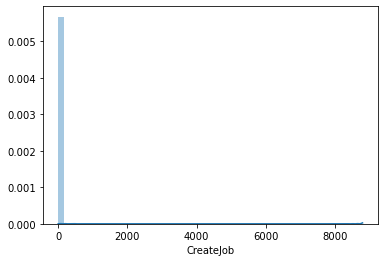

In [160]:
sns.distplot(df_num['CreateJob']);

In [125]:
df_num['CreateJob'].value_counts()

0       449325
1        39964
2        34251
3        16146
4        11351
         ...  
158          1
154          1
145          1
141          1
1530         1
Name: CreateJob, Length: 222, dtype: int64

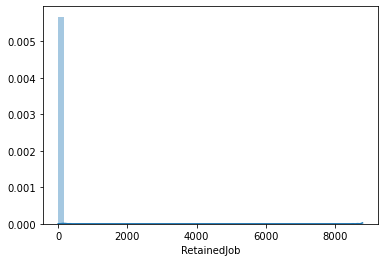

In [159]:
sns.distplot(df_num['RetainedJob']);

In [124]:
df_num['RetainedJob'].value_counts()

0       312861
1        59539
2        50319
3        33276
4        26211
         ...  
237          1
232          1
219          1
7250         1
585          1
Name: RetainedJob, Length: 315, dtype: int64

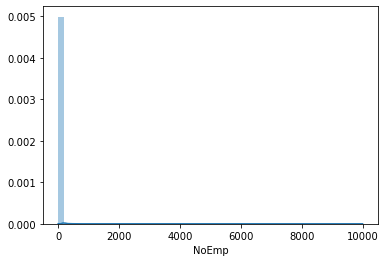

In [162]:
sns.distplot(df_num['NoEmp']);

In [126]:
df_num['NoEmp'].value_counts()

1       101885
2        91127
3        60207
4        49303
5        40495
         ...  
688          1
823          1
7241         1
312          1
660          1
Name: NoEmp, Length: 529, dtype: int64

In [170]:
df_cat.columns

Index(['Name', 'City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalFY', 'NewExist', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate', 'MIS_Status',
       'Sector', 'same_state_loan'],
      dtype='object')

In [171]:
df_num.columns

Index(['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'DisbursementGross',
       'BalanceGross', 'ChgOffPrinGr', 'gross_loan', 'SBA_loan', 'MIS_Status'],
      dtype='object')

In [78]:
predictors = ['MIS_Status','NewExist', 'is_franchise', 'UrbanRural','RevLineCr', 'LowDoc',
                 'Sector', 'same_state_loan', 'gross_loan', 'SBA_loan', 'Term']

In [79]:
df_model = df[predictors]

In [80]:
df_model.iloc[:,-3:]

,gross_loan,SBA_loan,Term
0,60000.0,48000.0,84
1,40000.0,32000.0,60
2,287000.0,215250.0,180
3,35000.0,28000.0,60
4,229000.0,229000.0,240
...,...,...,...
899158,79000.0,63200.0,84
899160,85000.0,42500.0,60
899161,300000.0,225000.0,108
899162,75000.0,60000.0,60


### Change target value to integers
#### 1 is more likely to pay in full
#### 0 is more likely to default in loan

In [81]:
df_model.loc[df_model['MIS_Status'] == 'P I F', 'MIS_Status'] = 1
df_model.loc[df_model['MIS_Status'] == 'CHGOFF', 'MIS_Status'] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [83]:
df_model.loc[df_model['Sector'] == 'Unknown', 'Sector'] = 'Other services'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Feature Scaling of numeric values

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model.iloc[:,-3:])

In [85]:
df_model_scaled

array([[-0.43258127, -0.4089683 , -0.27976628],
       [-0.51020292, -0.484938  , -0.59744458],
       [ 0.4484244 ,  0.38515243,  0.99094688],
       ...,
       [ 0.49887847,  0.43144646,  0.03791201],
       [-0.37436504, -0.35199103, -0.59744458],
       [-0.54901374, -0.52292284, -0.75628372]])

In [86]:
df_model.iloc[:,-3:] = df_model_scaled

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Encode categorical values

In [87]:
df_copy = pd.get_dummies(df_model, columns=['NewExist', 'is_franchise', 'UrbanRural','RevLineCr', 'LowDoc',
                 'Sector', 'same_state_loan'])

In [88]:
df_copy.head()

,MIS_Status,gross_loan,SBA_loan,Term,NewExist_1.0,NewExist_2.0,is_franchise_False,is_franchise_True,UrbanRural_0,UrbanRural_1,...,Sector_Other services,"Sector_Professional, scientific, and technical services",Sector_Public administration,"Sector_Real estate, rental and leasing",Sector_Retail trade,Sector_Transportation and Warehousing,Sector_Utilities,Sector_Wholesale Trade,same_state_loan_False,same_state_loan_True
0,1,-0.432581,-0.408968,-0.279766,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,-0.510203,-0.484938,-0.597445,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0.448424,0.385152,0.990947,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,-0.529608,-0.503930,-0.597445,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0.223322,0.450439,1.785143,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [98]:
df_copy['MIS_Status'] = df_copy['MIS_Status'].astype('int')

In [100]:
from sklearn.model_selection import train_test_split

X = df_copy.drop('MIS_Status', axis=1)
y = df_copy['MIS_Status'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Models
1. Logistic Regression
2. Support Vector Machine Classifier
3. Random Forest Classifier

### Evaluation
1. Cross Validation Score
2. Precision
3. Recall
4. f1-score (average of precision and recall)

## Logistic Regresssion

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=2000)

In [102]:
np.mean(cross_val_score(log_reg, X_train, y_train, cv=3))

0.8517645986773695

In [103]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [104]:
log_pred = log_reg.predict(X_test)

In [105]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, log_pred)

0.8652328281974391

In [106]:
recall_score(y_test, log_pred)

0.9724080685647996

In [107]:
from sklearn.metrics import f1_score

f1_score(y_test, log_pred)

0.9156951010491026

## Support Vector Machine Classifier

In [108]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(C=1, loss='hinge')

In [109]:
np.mean(cross_val_score(svc_model, X_train, y_train, cv=3))

0.8186911561085098

In [110]:
svc_model.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge')

In [111]:
svc_pred = svc_model.predict(X_test)

In [112]:
precision_score(y_test, svc_pred)

0.8193528298330861

In [113]:
recall_score(y_test, svc_pred)

1.0

In [114]:
f1_score(y_test, svc_pred)

0.9007080060531815

## Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()

In [116]:
np.mean(cross_val_score(forest_model, X_train, y_train, cv=3))

0.9206339782706996

In [117]:
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
forest_pred = forest_model.predict(X_test)

In [119]:
precision_score(y_test, forest_pred)

0.9417292501653761

In [120]:
recall_score(y_test, forest_pred)

0.968127768943826

In [121]:
f1_score(y_test, forest_pred)

0.9547460661081222

### Random Forest Classifier performed the best in terms of precision, recall, and accuracy

## Feature importance

In [122]:
def feature_importance(model, data):
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

,imp,col
20,0.001163,Sector_Finance and Insurance
6,0.001450,is_franchise_True
5,0.001456,is_franchise_False
17,0.001499,"Sector_Arts, entertainment, and recreation"
16,0.001626,"Sector_Agriculture, forestry, fishing and hunting"
15,0.001977,Sector_Administrative support and waste manag...
28,0.001988,"Sector_Real estate, rental and leasing"
30,0.002072,Sector_Transportation and Warehousing
12,0.002158,LowDoc_N
32,0.002459,Sector_Wholesale Trade


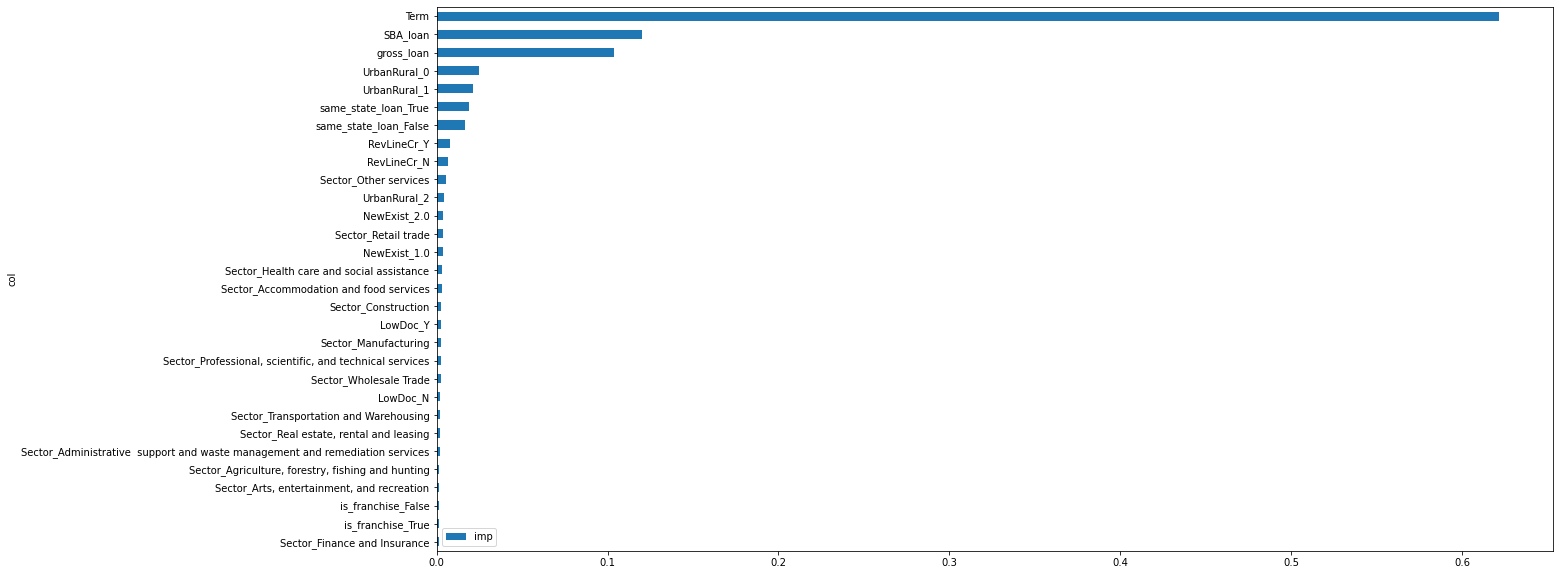

In [123]:
feature_importance(forest_model, X_train)

## Findings
Based on the Random Forest Classifier, the top features that had the highest contribution to classifying if a loan would be paid in full or charged off consist of the term loan, amount, if the lender and borrower are in the same state, if it was a new or existing business, if it was a revolving line of credit loan, if it was an urban or rural business, and various business sectors.